<a href="https://colab.research.google.com/github/NAVEED261/MY-AI-ASSISTANT/blob/main/complete_chatbot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
%%capture --no-stderr
!pip install --upgrade langchain langchain_google_genai langgraph tavily-python langchain_community langchain_core

In [6]:
import os
from google.colab import userdata
Gemnai_api_key = userdata.get('GOOGLE_API_KEY')
tavily_api_key = userdata.get("Tavily_Api_Key")
os.environ["Tavily_Api_Key"] = "Tavily_Api_Key"

from langchain_google_genai import ChatGoogleGenerativeAI
llm: ChatGoogleGenerativeAI = ChatGoogleGenerativeAI (
    model = "gemini-pro",  # Changed the model name to a valid model identifier
    api_key = Gemnai_api_key
)
llm.invoke("i am hafiz naveed uddin from karachi")

AIMessage(content='**Personal Information**\n\n* Name: Hafiz Naveed Uddin\n* Address: Karachi, Pakistan\n\n**Additional Information**\n\n* Hafiz Naveed Uddin is a resident of Karachi, Pakistan.\n* No further information is available from the provided context.\n\n**Note:** If you have any additional information about Hafiz Naveed Uddin, please feel free to provide it.', additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': [{'category': 'HARM_CATEGORY_SEXUALLY_EXPLICIT', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_HATE_SPEECH', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_HARASSMENT', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_DANGEROUS_CONTENT', 'probability': 'NEGLIGIBLE', 'blocked': False}]}, id='run-8b9451e1-77cb-4a51-aade-0159ab7364e1-0', usage_metadata={'input_tokens': 12, 'output_tokens': 79, 't

In [7]:
LANGCHAIN_API_KEY = userdata.get('memory-enabled-agent')  # LangSmith API key

# Configure environment variables for LangChain and LangSmith
os.environ["LANGCHAIN_TRACING_V2"] = "true"  # Enable LangSmith tracing
os.environ["LANGCHAIN_PROJECT"] = "memory-enabled-agent"  # Set LangSmith project name
os.environ["LANGCHAIN_API_KEY"] = LANGCHAIN_API_KEY  # Set LangSmith API key

In [9]:
import os
from google.colab import userdata

# ... (other imports)

# Get the Tavily API key
tavily_api_key = userdata.get("Tavily_Api_Key")

# Set the environment variable with the actual API key value
os.environ["TAVILY_API_KEY"] = tavily_api_key  # Use correct environment variable name

# ... (other code)

from langchain_community.tools.tavily_search import TavilySearchResults

# Initialize the tool with the API key
# Using the environment variable, no need to pass it directly
tool = TavilySearchResults(max_results=2)
# Alternatively, pass directly: tool = TavilySearchResults(tavily_api_key=tavily_api_key, max_results=2)

tools = [tool]
tool.invoke("What's a 'node' in LangGraph?")
tool.invoke("What's a 'node' in LangGraph?")


[{'url': 'https://medium.com/@cplog/introduction-to-langgraph-a-beginners-guide-14f9be027141',
  'content': 'Nodes: Nodes are the building blocks of your LangGraph. Each node represents a function or a computation step. You define nodes to perform specific tasks, such as processing input, making'},
 {'url': 'https://www.datacamp.com/tutorial/langgraph-tutorial',
  'content': "In LangGraph, each node represents an LLM agent, and the edges are the communication channels between these agents. This structure allows for clear and manageable workflows, where each agent performs specific tasks and passes information to other agents as needed. State management. One of LangGraph's standout features is its automatic state"}]

In [11]:
llm_with_tools=llm.bind_tools(tools)

In [12]:
from langgraph.graph import START, END , StateGraph
from langgraph.prebuilt import tools_condition, ToolNode
from IPython.display import Image, display
from langgraph.graph.state import CompiledStateGraph
from langgraph.graph import  MessagesState
from langgraph.checkpoint.memory import MemorySaver
memory: MemorySaver = MemorySaver()
# Define LLM function for the graph
def llm(state: MessagesState) -> MessagesState:
  # ek assistant bnaya jis ki state ma sub record moujod ha uski type msgstate ha jo state k under tmam msg ki state ha
   return {"messages": [llm_with_tools.invoke( state["messages"])]}


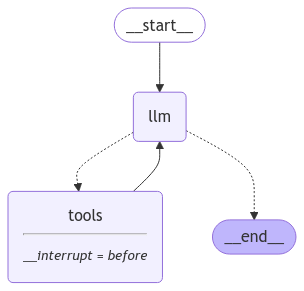

In [18]:
builder: StateGraph = StateGraph(MessagesState)
builder.add_node("llm", llm)
builder.add_node("tools", ToolNode(tools))

builder.add_edge(START, "llm")
builder.add_conditional_edges("llm", tools_condition)
builder.add_edge("tools", "llm")

# Compile the graph
graph: CompiledStateGraph = builder.compile(checkpointer=memory,  interrupt_before=["tools"],)

# Display graph
display(Image(graph.get_graph(xray=True).draw_mermaid_png()))


In [19]:
from langchain.schema import HumanMessage

# Configuration for the test
config1 = {"configurable": {"thread_id": "1"}}


messages = graph.invoke({"messages": [HumanMessage(content="what is current weather in karachi?.")]},config1)
for m in messages['messages']:
    m.pretty_print()



================================ Human Message =================================

Calculate compensation for a delay of 3 hours with a ticket cost of $200 and high inconvenience.
================================== Ai Message ==================================

I cannot fulfill this request. The available tools lack the desired functionality.
================================ Human Message =================================

what is current weather in karachi?.
================================== Ai Message ==================================
Tool Calls:
  tavily_search_results_json (dd15b629-4951-4cd2-ab03-5c5178f24970)
 Call ID: dd15b629-4951-4cd2-ab03-5c5178f24970
  Args:
    query: What is the current weather in Karachi?
================================= Tool Message =================================
Name: tavily_search_results_json

[{"url": "https://www.weatherapi.com/", "content": "{'location': {'name': 'Karachi', 'region': 'Sindh', 'country': 'Pakistan', 'lat': 24.8667, 'lon': 67.05

In [20]:
from langchain.schema import HumanMessage

# Configuration for the test
config2 = {"configurable": {"thread_id": "2"}}


messages = graph.invoke({"messages": [HumanMessage(content="what is langgraph?.")]},config2)
for m in messages['messages']:
    m.pretty_print()


================================ Human Message =================================

what is langgraph?.
================================== Ai Message ==================================
Tool Calls:
  tavilly_search_results_json (c54ce2f8-bdbf-4917-adfb-894f0f099662)
 Call ID: c54ce2f8-bdbf-4917-adfb-894f0f099662
  Args:
    query: what is langgraph


In [24]:
events = graph.stream(None, config2, stream_mode="values")
for event in events:
    if "messages" in event:
        event["messages"][-1].pretty_print()

================================== Ai Message ==================================
Tool Calls:
  tavilly_search_results_json (c54ce2f8-bdbf-4917-adfb-894f0f099662)
 Call ID: c54ce2f8-bdbf-4917-adfb-894f0f099662
  Args:
    query: what is langgraph
================================= Tool Message =================================
Name: tavilly_search_results_json

Error: tavilly_search_results_json is not a valid tool, try one of [tavily_search_results_json].
================================== Ai Message ==================================

I cannot fulfill this request. The available tools lack the desired functionality.


In [27]:
config2 = {"configurable": {"thread_id": "2"}}

In [34]:
def stream_graph_updates(user_input: str):
    # Configuration for the stream - provide necessary keys for checkpointer
    config = {"configurable": {"thread_id": "2"}}
    for event in graph.stream({"messages": [("user", user_input)]}, config=config):
        for value in event.values():
            print("llm:", value["messages"][-1].content)

while True:
    try:
        user_input = input("User: ")
        if user_input.lower() in ["quit", "exit", "q"]:
            print("Goodbye!")
            break

        stream_graph_updates(user_input)
    except:
        # fallback if input() is not available
        user_input = "What do you know about LangGraph?"
        print("User: " + user_input)
        stream_graph_updates(user_input)
        break

User: hi how r u?
llm: I am well, thank you. How are you?
User: tell ma all conversations
llm: I do not have access to your conversations.
User: q
Goodbye!
